### Rodrigo Sastré
## Problem 2: Counting Words, Intro to NLP



# Counting Words with NLTK Tokenizer

Last updated: 2025-02-25 (removed irrelevant cells to create a simple trigram language model)

In [1]:
# pandas dataframes and utils for counting
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 300)

from collections import Counter

# plotting
import matplotlib
import matplotlib.pyplot as plt

# settings to display plots and data
%matplotlib inline
plt.rcParams.update({'font.size': 22})




## Movie Review data from Cornell

Let's load a collection of movie reviews. We will use a Pandas dataframe to represent our textual data. In the dataframe, there's single column called `text` that has the textual review. Each record is a review. 

The original data was prepared by Bo Pand and Lillian Lee at Cornell University, and is available here: https://www.cs.cornell.edu/people/pabo/movie-review-data/. It is a simplified textual dataset, where each review is just one sentence, and all words have been lowercased and explicitly separated by spaces. Also, the authors who prepared the dataset artificially selected 50% of positive reviews and 50% of negative reviews. This is never the case in real data, many sentences (even in reviews) are simply neutral (not positive, nor negative). Also, a single sentence can express positive and negative aspects at the same time. We will accept the simplifications and move on.

The dataset is a very popular benchmark for sentence classification in NLP. We took the original data, split it into train and test, and put it in the form of a Pandas df. 


In [2]:
movie_reviews_df = pd.read_csv('../data/movie_reviews_text.csv')

Let's see the reviews! By default, the notebook will display a summary of any df ... but it does not display the full text! 

In [13]:
movie_reviews_df

,text
0,"the rock is destined to be the 21st century's new "" conan "" and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal ."
1,"the gorgeously elaborate continuation of "" the lord of the rings "" trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson's expanded vision of j . r . r . tolkien's middle-earth ."
2,effective but too-tepid biopic
3,"if you sometimes like to go to the movies to have fun , wasabi is a good place to start ."
4,"emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one ."
...,...
10657,a terrible movie that some people will nevertheless find moving .
10658,there are many definitions of 'time waster' but this movie must surely be one of them .
10659,"as it stands , crocodile hunter has the hurried , badly cobbled look of the 1959 godzilla , which combined scenes of a japanese monster flick with canned shots of raymond burr commenting on the monster's path of destruction ."
10660,the thing looks like a made-for-home-video quickie .


In [3]:
import nltk

In [4]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/rodrigo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
word_counts_movies = Counter()
for text in movie_reviews_df.text:
    word_counts_movies.update(nltk.word_tokenize(text))

/var/folders/ql/zn80hp1x1xq2fg_1g7n3nn880000gp/T/ipykernel_2747/1126527320.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


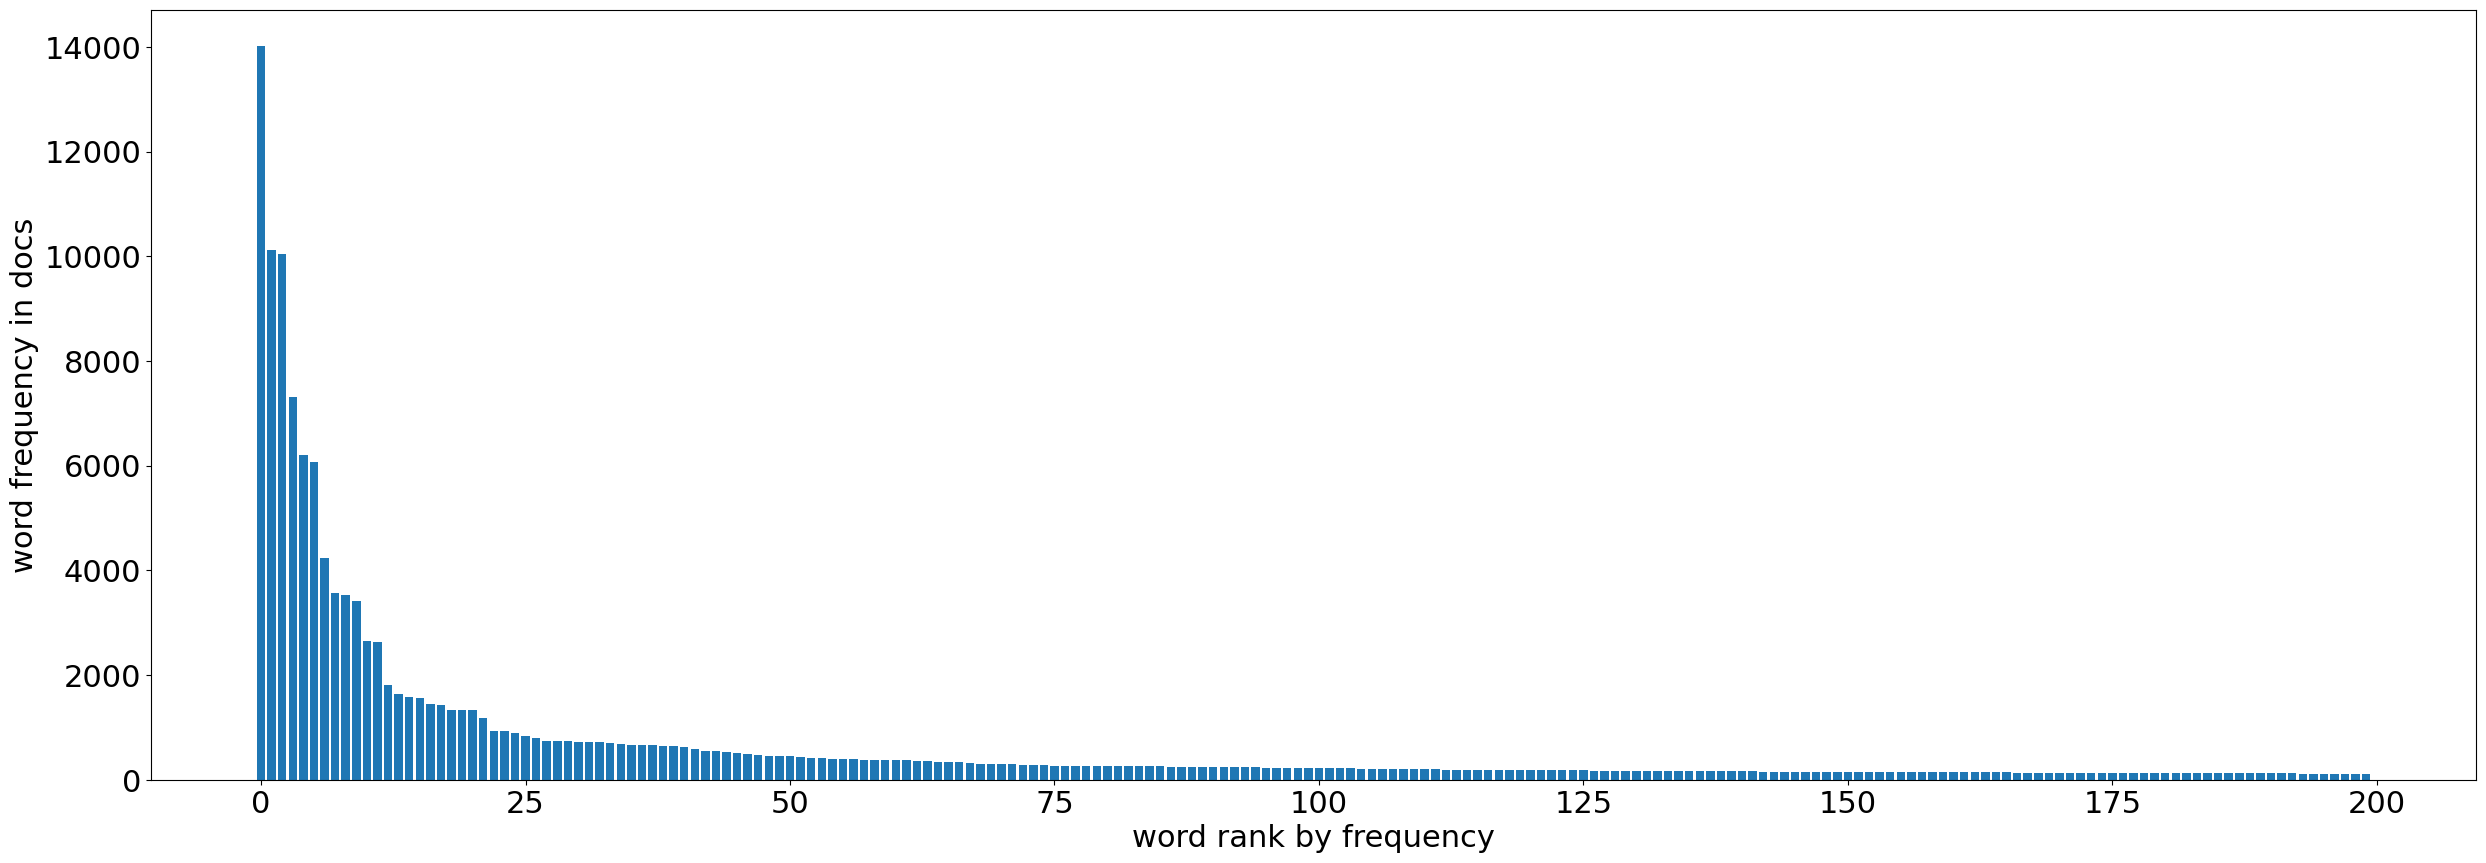

In [7]:
N = 200
fig = plt.figure(figsize=(30,10))
plt.bar(range(N), [w[1] for w in word_counts_movies.most_common(N)])
plt.xlabel('word rank by frequency')
plt.ylabel('word frequency in docs')
fig.show()

Observation:
* A few words are very frequent (frequencies > 1000), but only a few (less than 25!)
* Then, there is a tail of words with less and less frequency, and this tail is very long (the full plot has 20K words for the movie reviews)
    
    
This shape is characterized by Zipf's Law (https://en.wikipedia.org/wiki/Zipf%27s_law). Zipf's law states that "given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc." (quote from the Wikipedia page).

The same phenomena can be seen in a histogram. Each bar in a histogram counts the number of words that we see in a
frequency interval. 

(array([1.0123e+04, 5.6440e+03, 2.2160e+03, 1.1620e+03, 6.9300e+02,
        2.0700e+02, 1.2300e+02, 6.4000e+01, 2.4000e+01, 1.0000e+01,
        6.0000e+00]),
 array([1.e+00, 2.e+00, 5.e+00, 1.e+01, 2.e+01, 5.e+01, 1.e+02, 2.e+02,
        5.e+02, 1.e+03, 2.e+03, 5.e+03]),
 <BarContainer object of 11 artists>)

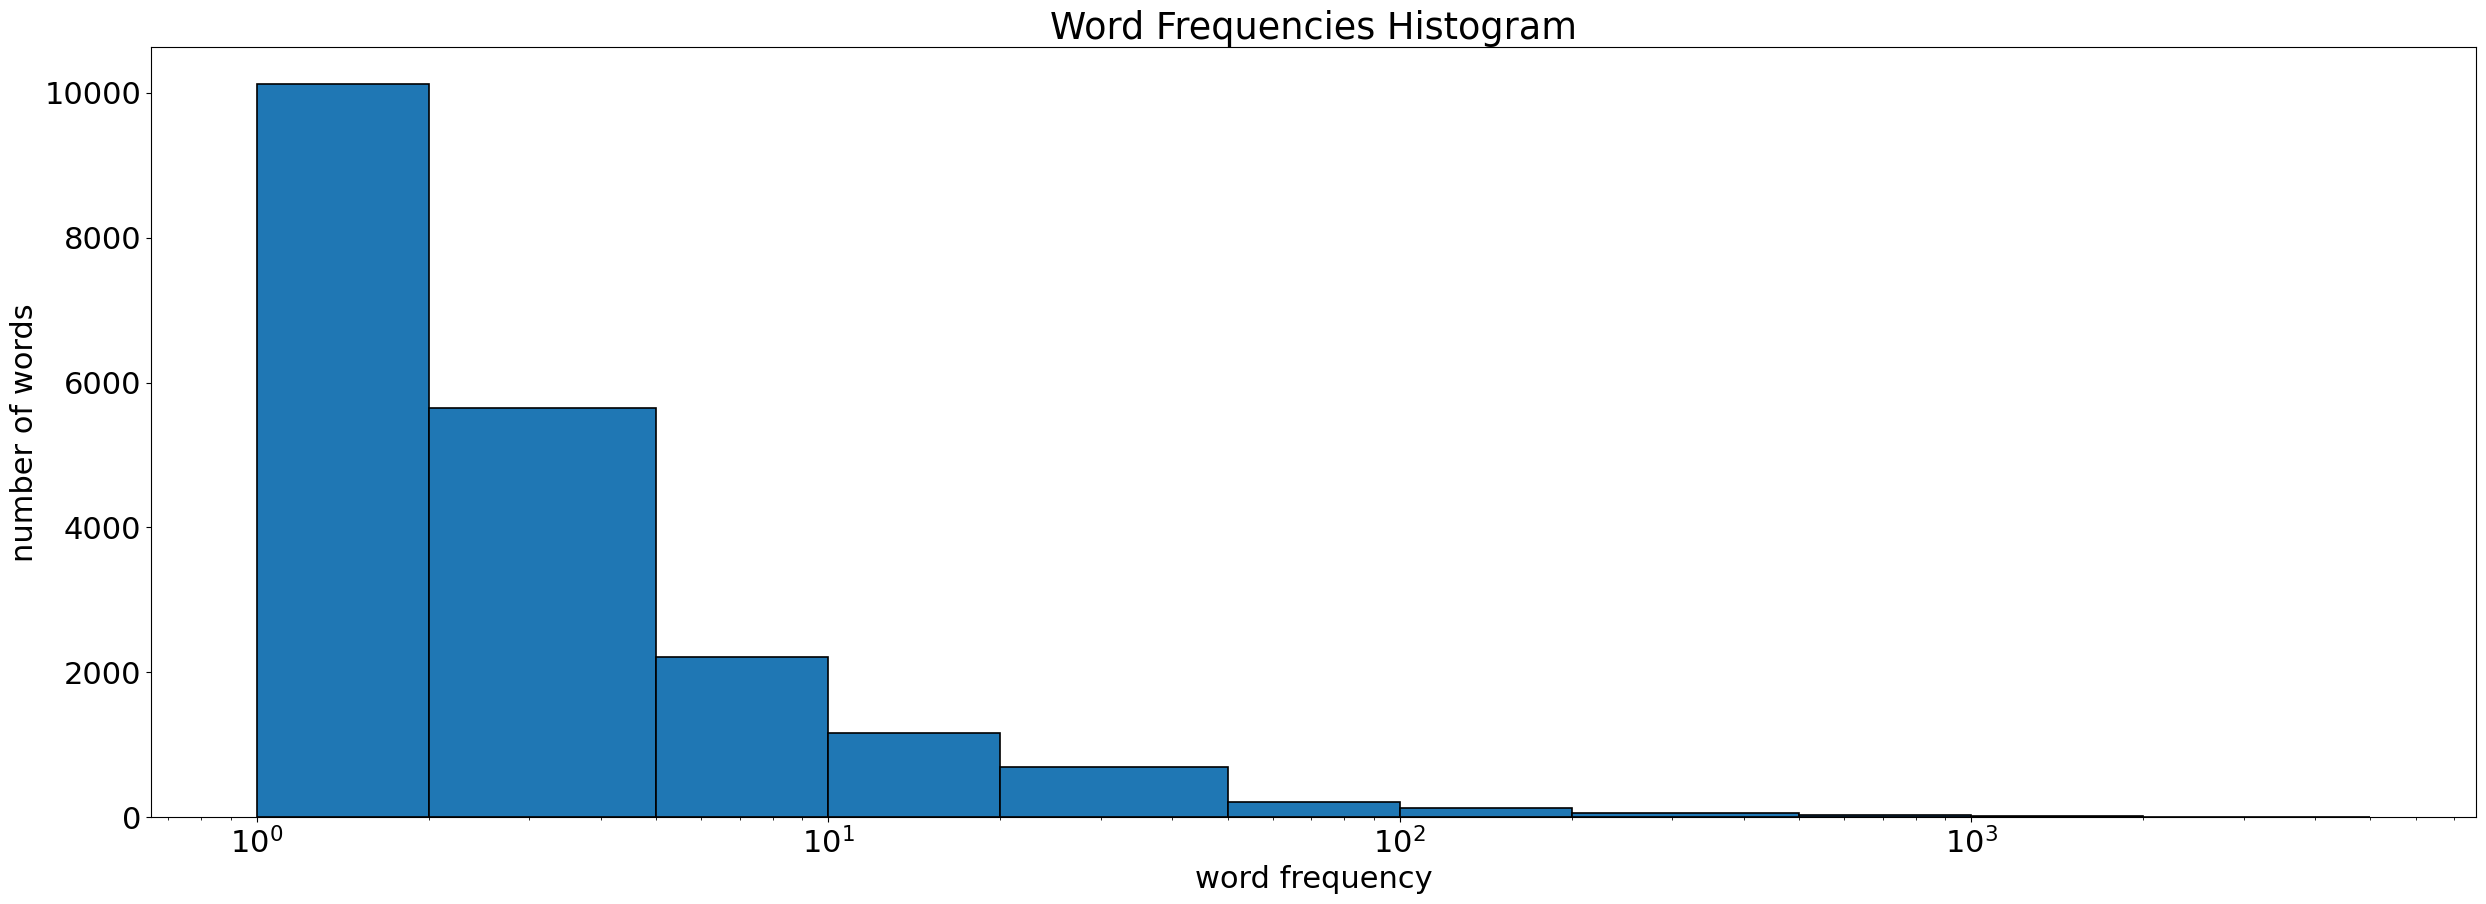

In [9]:
plt.figure(figsize=(30,10))
plt.title('Word Frequencies Histogram')
plt.xlabel('word frequency')
plt.ylabel('number of words')
plt.xscale('log')
plt.hist(word_counts_movies.values(),
         bins=[1,2,5,10,20,50,100,200,500,1000,2000,5000], 
         log=False, 
         edgecolor='black', linewidth=1.2)

## Problem 2: Counting Words Questions

### List top 10 words, 10 words in a mid frequency range, and 10 words in a low frequency range.

In [10]:
agnews = pd.read_csv('../data/agnews_train.csv')
print(f"Texts in the agnews dataset:{len(agnews)}")

word_counts = Counter()
for text in agnews['text']:
    word_counts.update(nltk.word_tokenize(text))

total_uniq_words = len(word_counts)
print(f"Unique words in agnews dataset:{total_uniq_words}")

top_10 = word_counts.most_common(10)
print("Top 10 words in agnews:")
for word, num in top_10:
    print(f"{word}:{num}")

mid_start = (total_uniq_words // 2) - 5
mid_end = (total_uniq_words // 2) + 5
mid_words = word_counts.most_common()[mid_start:mid_end]
print("\n10 Mid-frequency words in agnews:")
for word, num in mid_words:
    print(f"{word}: {num}")


last_10 = word_counts.most_common()[-10:]
print("\n10 Least-frequent words in agnews:")
for word, num in last_10:
    print(f"{word}: {num}")



Texts in the agnews dataset:109999
Unique words in agnews dataset:99899
Top 10 words in agnews:
the:158252
,:132758
.:122347
to:87264
a:86788
of:81310
in:69207
and:59883
;:56149
on:42493

10 Mid-frequency words in agnews:
YELL.O: 2
energy-price: 2
non-energy: 2
Placed: 2
Designated: 2
Durrington: 2
demilitarised: 2
\Two: 2
bilking: 2
unionists: 2

10 Least-frequent words in agnews:
Baita: 1
Irish\prime: 1
Northern\Ireland: 1
WORKERS: 1
12:21: 1
Engines\\Wotbox: 1
geo-targeting: 1
observances: 1
MARTHA: 1
WASHINGTON-NextWave: 1


### Draw rank-frequency plot on AGNews, compare the shape and frequencies to that of Movie Reviews.

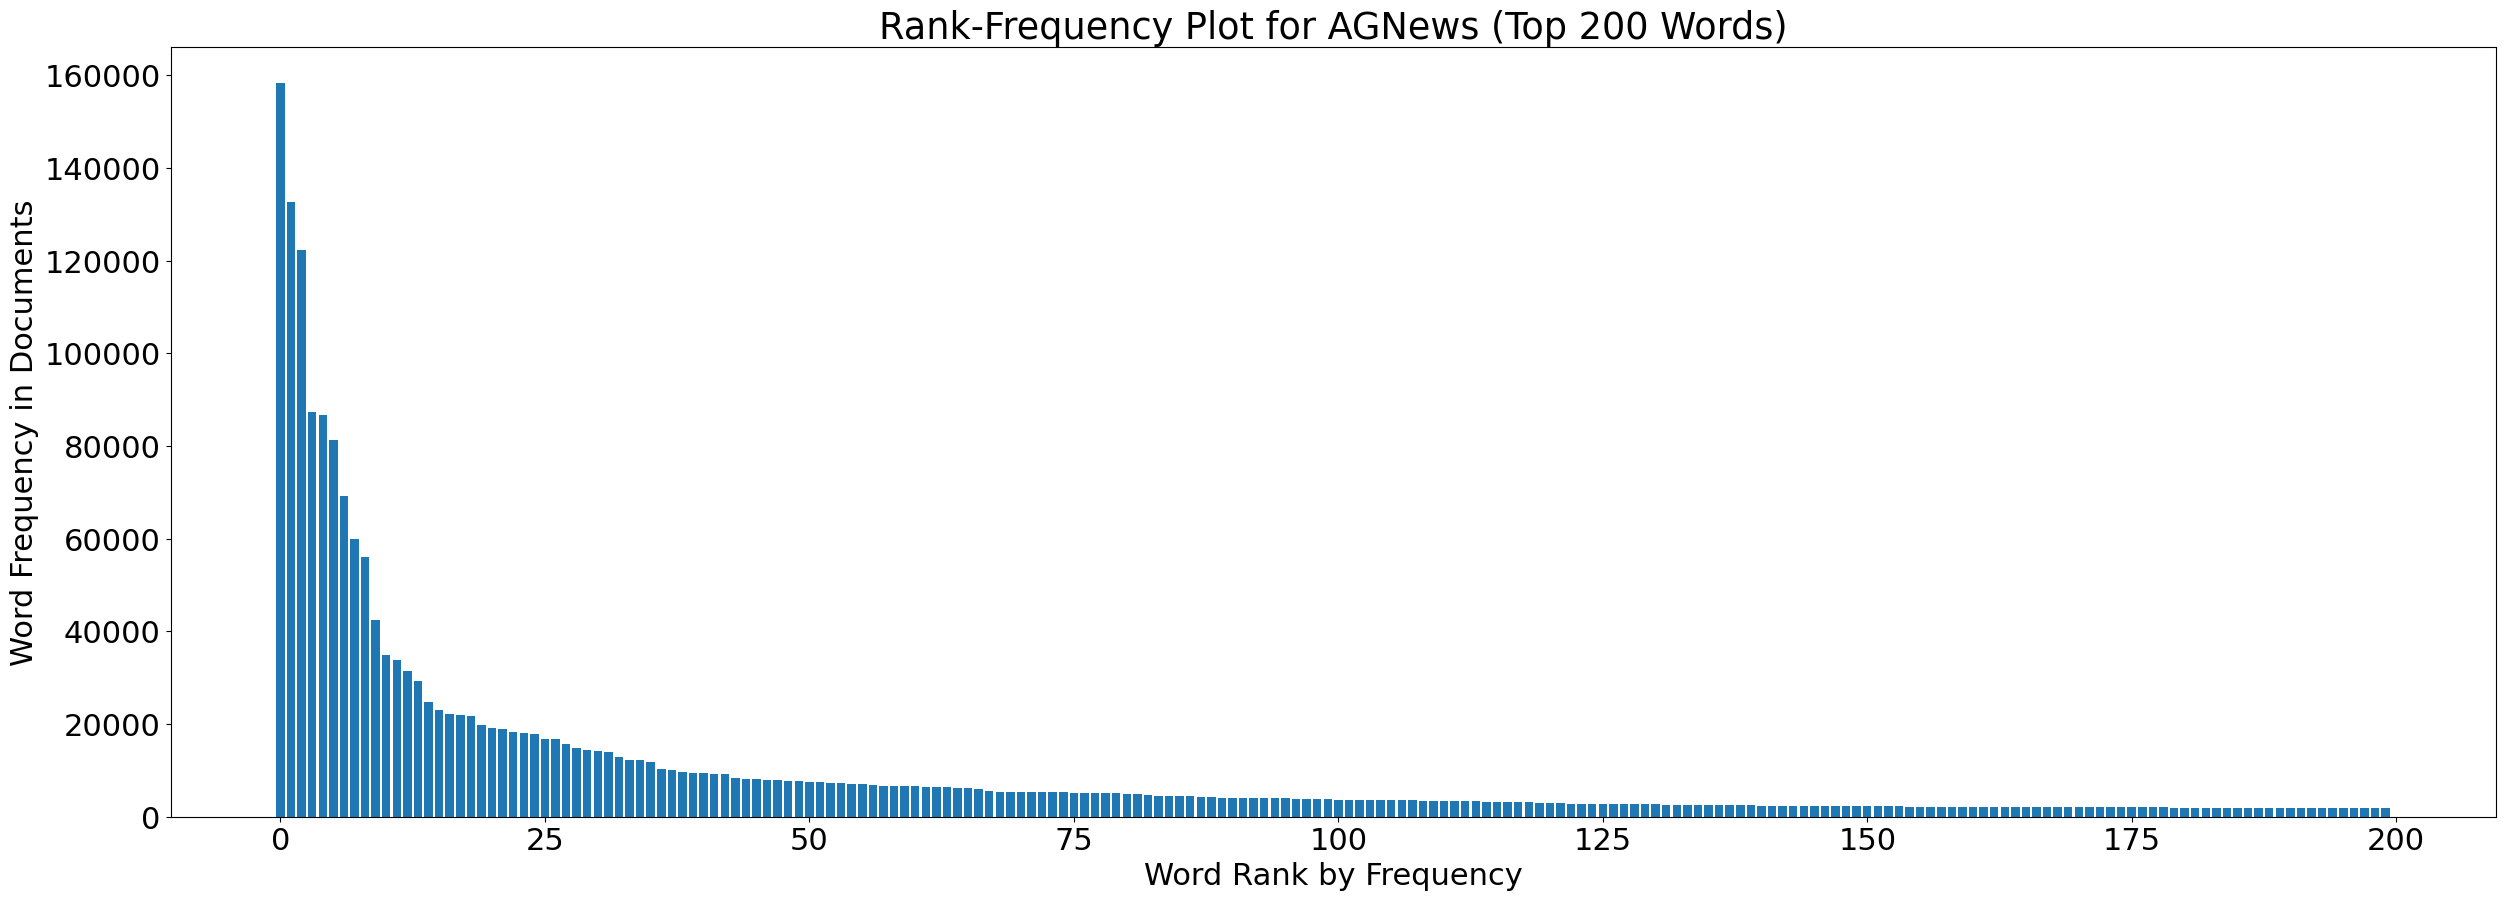

In [11]:
N = 200
ranks = range(N)
frequencies = [freq for word, freq in word_counts.most_common(N)]

plt.figure(figsize=(30, 10))
plt.bar(ranks, frequencies)
plt.xlabel('Word Rank by Frequency')
plt.ylabel('Word Frequency in Documents')
plt.title('Rank-Frequency Plot for AGNews (Top 200 Words)')
plt.show()

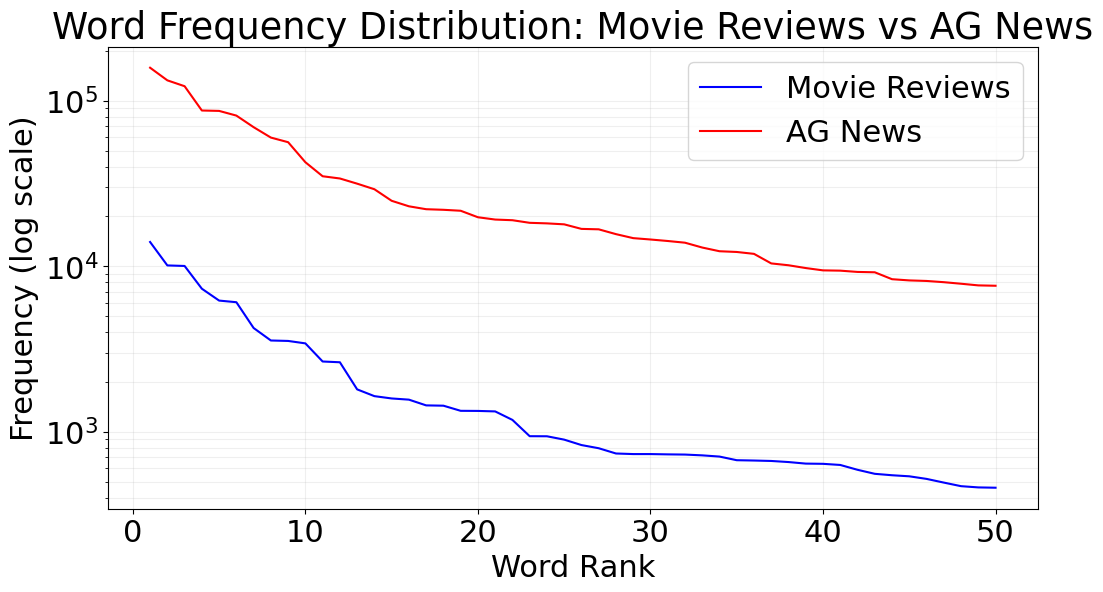

In [12]:
import matplotlib.pyplot as plt

movie_words, movie_freq = zip(*word_counts_movies.most_common(50))
agnews_words, agnews_freq = zip(*word_counts.most_common(50))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), movie_freq, 'b-', label='Movie Reviews')
plt.plot(range(1, 51), agnews_freq, 'r-', label='AG News')

# Customize the plot
plt.yscale('log')  # Log scale to better visualize the distribution
plt.xlabel('Word Rank')
plt.ylabel('Frequency (log scale)')
plt.title('Word Frequency Distribution: Movie Reviews vs AG News')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)

# Show the plot
plt.show()

### List top 10 bigrams.

In [13]:
bigram_counts = Counter()

for text in agnews['text']:
    tokens = ['_START_'] + nltk.word_tokenize(text) + ['_STOP_']
    bigram_counts.update(nltk.bigrams(tokens))

top_10_bigrams = bigram_counts.most_common(10)
print("\nTop 10 bigrams in AGNews:")
for bigram, freq in top_10_bigrams:
    print(f"{bigram}: {freq}")


Top 10 bigrams in AGNews:
('.', '_STOP_'): 91901
('#', '39'): 29120
('39', ';'): 29120
(';', 's'): 22997
('in', 'the'): 18473
('of', 'the'): 18048
(',', 'the'): 12134
(')', '-'): 11198
('_START_', 'The'): 9811
('quot', ';'): 8148


## Compare to Movie Reviews texts:

### For the top 10 and 100 words on each set, how many are the same words?

In [14]:
word_counts_movie = Counter()
for text in movie_reviews_df['text']:
    word_counts_movie.update(nltk.word_tokenize(text))

top_10_agnews = set(word for word, freq in word_counts.most_common(10))
top_10_movie = set(word for word, freq in word_counts_movie.most_common(10))
common_top_10 = top_10_agnews.intersection(top_10_movie)
print("Common top 10 words:", len(common_top_10))
print(common_top_10)
    
top_100_agnews = set(word for word, freq in word_counts.most_common(100))
top_100_movie = set(word for word, freq in word_counts_movie.most_common(100))
common_top_100 = top_100_agnews.intersection(top_100_movie)
print("Common top 100 words:", len(common_top_100))
print(common_top_100)


Common top 10 words: 7
{'the', 'a', '.', ',', 'and', 'of', 'to'}
Common top 100 words: 48
{'about', 'into', 'their', 'on', 'he', 'they', 'are', 'of', ')', 'have', 'it', 'up', 'to', 'been', 'in', 'the', '?', 'is', 'which', 'would', 'be', 'at', 'has', 'from', 'one', 'this', 'who', "'s", 'by', 'out', 'his', '--', 'a', 'was', 'than', 'as', 'with', 'will', 'not', 'an', 'but', '.', ',', 'its', 'and', 'more', 'that', 'for'}


### How many words are in one set but not in the other? For bigrams, how many bigrams are in one set but not in the other?

In [15]:
unique_bigrams_agnews = set()
for text in agnews['text']:
    words = nltk.word_tokenize(text)
    bigrams = nltk.bigrams(words)
    unique_bigrams_agnews.update(bigrams)

unique_bigrams_movie = set()
for text in movie_reviews_df['text']:
    words = nltk.word_tokenize(text)
    bigrams = nltk.bigrams(words)
    unique_bigrams_movie.update(bigrams)

unique_words_agnews = set(word_counts.keys())
unique_words_movie = set(word_counts_movie.keys())

words_in_agnews_not_movie = unique_words_agnews - unique_words_movie
words_in_movie_not_agnews = unique_words_movie - unique_words_agnews

# Compute differences for bigrams
bigrams_in_agnews_not_movie = unique_bigrams_agnews - unique_bigrams_movie
bigrams_in_movie_not_agnews = unique_bigrams_movie - unique_bigrams_agnews

# Print the results
print("Words in agnews but not in movie_reviews:", len(words_in_agnews_not_movie))
print("Words in movie_reviews but not in agnews:", len(words_in_movie_not_agnews))
print("Bigrams in agnews but not in movie_reviews:", len(bigrams_in_agnews_not_movie))
print("Bigrams in movie_reviews but not in agnews:", len(bigrams_in_movie_not_agnews))

Words in agnews but not in movie_reviews: 87912
Words in movie_reviews but not in agnews: 8291
Bigrams in agnews but not in movie_reviews: 883683
Bigrams in movie_reviews but not in agnews: 77388


### What happens if we put the two sets of texts together and recompute the counts? Will the added counts exhibit a Zipfian distribution?

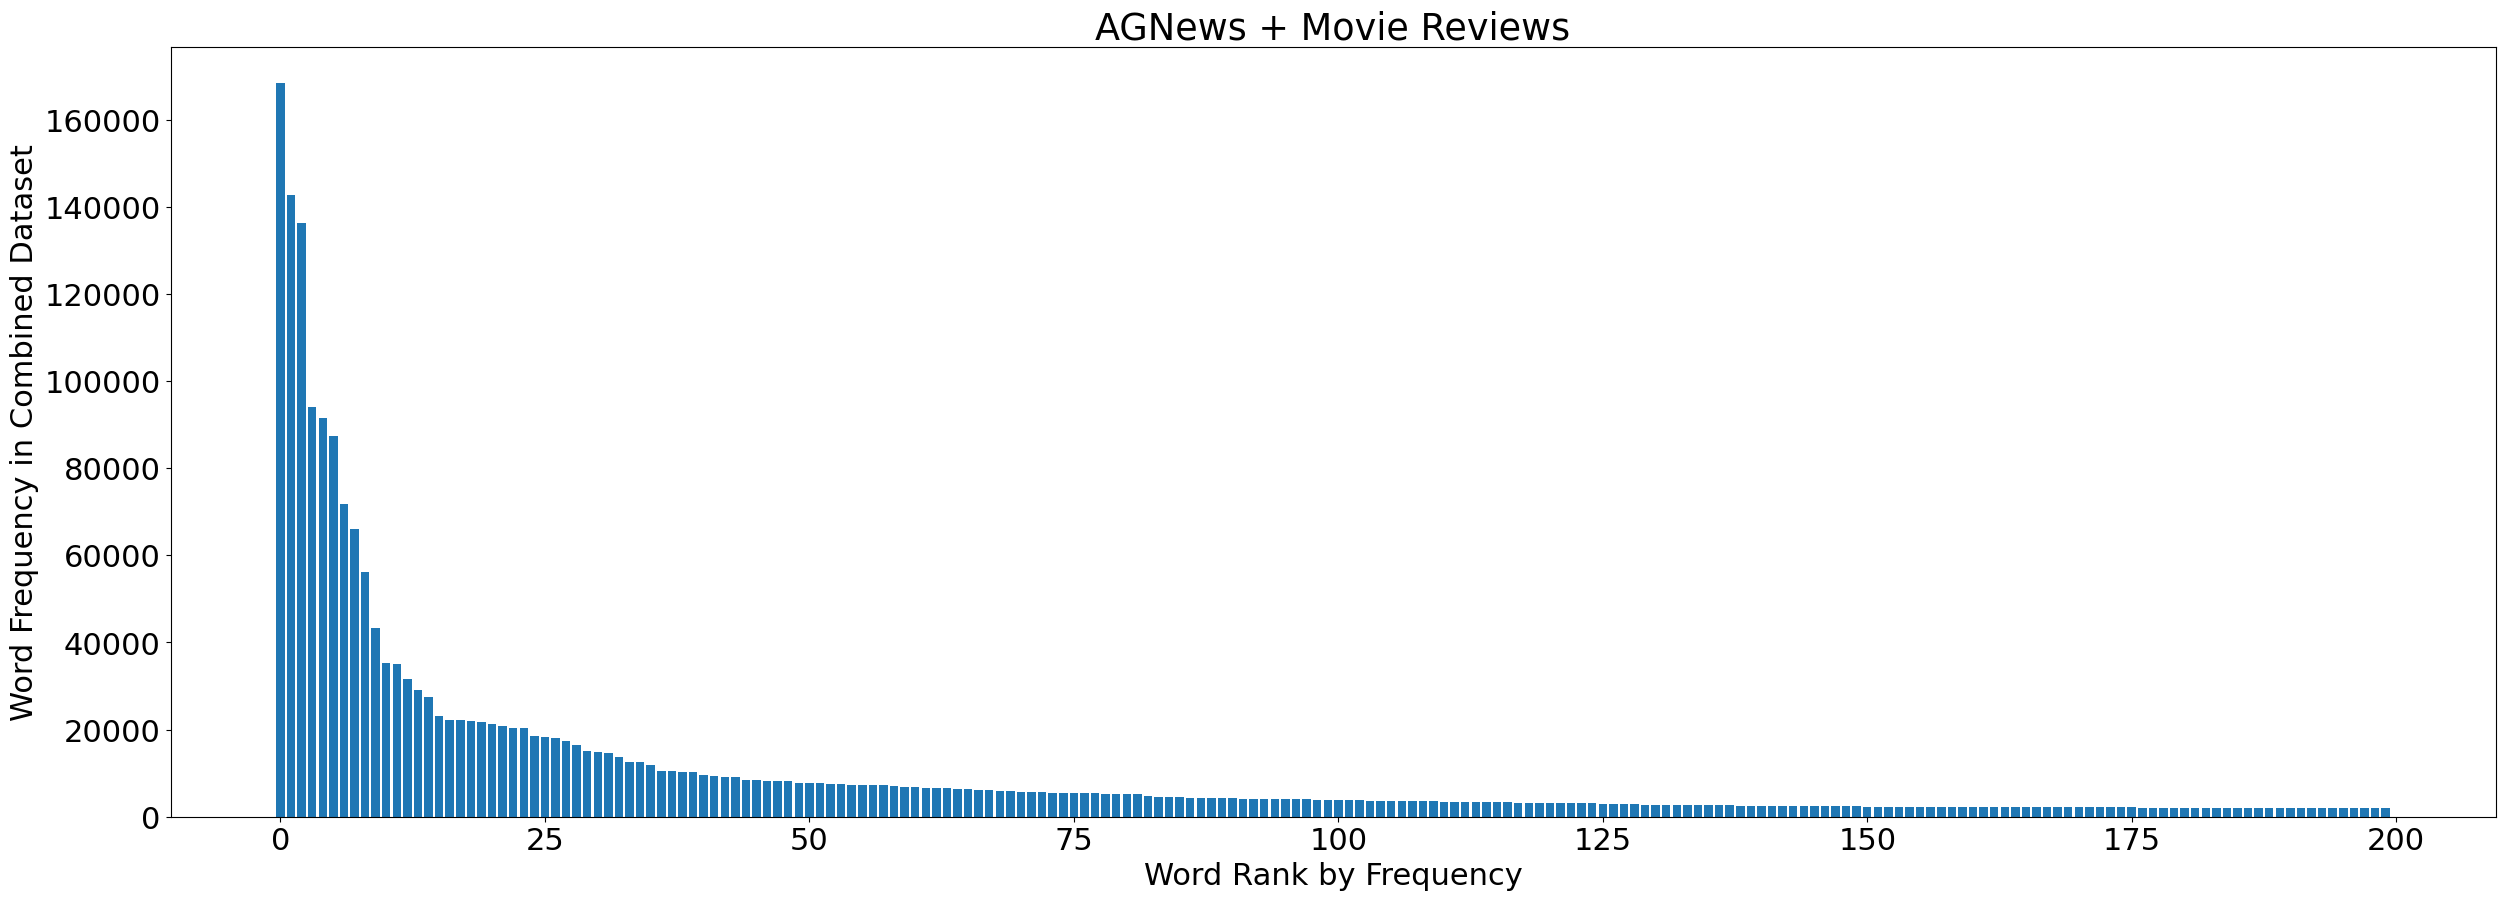

In [17]:
combined_word_counts = Counter()
for text in agnews['text']:
    combined_word_counts.update(nltk.word_tokenize(text))
for text in movie_reviews_df['text']:
    combined_word_counts.update(nltk.word_tokenize(text))

plt.figure(figsize=(30, 10))
plt.bar(range(200), [freq for word, freq in combined_word_counts.most_common(200)])
plt.title('AGNews + Movie Reviews')
plt.xlabel('Word Rank by Frequency')
plt.ylabel('Word Frequency in Combined Dataset')
plt.show()